In [7]:
import os
import pickle
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams['figure.figsize'] = (5.0, 0.8) 
import matplotlib.patches as mpatches
from util.color_util import *
import pickle
from random import shuffle
import torch.optim as optim
import colorsys
from model.WM18 import *
from numpy import dot
from numpy.linalg import norm
from scipy import spatial
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000
from skimage import io, color
import random
from tabulate import tabulate

In [2]:
# load colors
cdict_train_rgb = pickle.load( open( "../munroe/cdict_train.p", "rb" ) )
cdict_dev_rgb = pickle.load( open( "../munroe/cdict_dev.p", "rb" ) )
cdict_test_rgb = pickle.load( open( "../munroe/cdict_test.p", "rb" ) )

triple_train = pickle.load( open( "../munroe/triple_train.p", "rb" ) )
triple_dev = pickle.load( open( "../munroe/triple_dev.p", "rb" ) )
triple_test = pickle.load( open( "../munroe/triple_test.p", "rb" ) )

In [22]:
triple_train[:50]

[('green', ('more', 'acidic'), ('green',), 'acidgreen'),
 ('green', ('more', 'apple'), ('green',), 'applegreen'),
 ('green', ('more', 'aqua'), ('green',), 'aquagreen'),
 ('green', ('more', 'avocado'), ('green',), 'avocadogreen'),
 ('green', ('more', 'baby'), ('green',), 'babygreen'),
 ('pink', ('more', 'baby'), ('pink',), 'babypink'),
 ('poop', ('more', 'baby'), ('poop',), 'babypoop'),
 ('poopgreen', ('more', 'baby'), ('poop', 'green'), 'babypoopgreen'),
 ('pukegreen', ('more', 'baby'), ('puke', 'green'), 'babypukegreen'),
 ('shitgreen', ('more', 'baby'), ('shit', 'green'), 'babyshitgreen'),
 ('yellow', ('more', 'banana'), ('yellow',), 'bananayellow'),
 ('pink', ('more', 'barbie'), ('pink',), 'barbiepink'),
 ('violet', ('bluer',), ('violet',), 'blueviolet'),
 ('green', ('bluer',), ('green',), 'blueygreen'),
 ('purple', ('bluer',), ('purple',), 'blueypurple'),
 ('green', ('more', 'bluish'), ('green',), 'bluishgreen'),
 ('purple', ('more', 'bluish'), ('purple',), 'bluishpurple'),
 ('pink

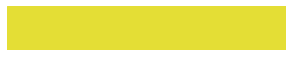

tensor([201.0617, 195.5154,  46.8495])

In [23]:
plot_color_single(cdict_train_rgb["yellow"].mean(dim=0))
cdict_train_rgb["yellow"].mean(dim=0)*225

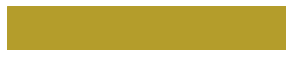

tensor([158.4540, 138.5822,  37.6169])

In [24]:
plot_color_single(cdict_train_rgb["brownyellow"].mean(dim=0))
cdict_train_rgb["brownyellow"].mean(dim=0)*225

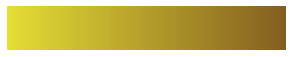

In [25]:
plot_color_change_raw(cdict_train_rgb["yellow"].mean(dim=0),
                      cdict_train_rgb["brownyellow"].mean(dim=0) - cdict_train_rgb["yellow"].mean(dim=0),
                      strength=2)